In [ ]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from random import randint
import numpy as np
import os
from PIL import Image
import tensorflow as tf

In [ ]:
# define some constants
N_Face_Items = 3
Face_Parts = {0: "nose", 1: "lip",2:'nose'}

# number of samples to take in each class
N = 100

# some other constants
N_EPOCHS = 10

# data files in the same order as defined in FRUITS
files = ["nose_bw_minist_dataset.npy", "lip_bw_minist_dataset.npy",'eye_bw_minist_dataset.npy']

In [ ]:
def load(dir, reshaped, files):
    "Load .npy or .npz files from disk and return them as numpy arrays. \
    Takes in a list of filenames and returns a list of numpy arrays."

    data = []
    for file in files:
        f = np.load(dir + file)
        if reshaped:
            new_f = []
            for i in range(len(f)):
                x = np.reshape(f[i], (28, 28))
                x = np.expand_dims(x, axis=0)
                x = np.reshape(f[i], (28, 28, 1))
                new_f.append(x)
            f = new_f
        data.append(f)
    return data

def single_load(file):
  new_f = []
  data = np.load(file)
  x = np.reshape(data, (28, 28))
  x = np.expand_dims(x, axis=0)
  x = np.reshape(data, (28, 28, 1))
  new_f.append(x)
  return new_f


def normalize(data):
    "Takes a list or a list of lists and returns its normalized form"

    return np.interp(data, [0, 255], [-1, 1])


def denormalize(data):
    "Takes a list or a list of lists and returns its denormalized form"

    return np.interp(data, [-1, 1], [0, 255])


def visualize(flat_arr):
    import matplotlib.pyplot as plt 
    shape = (14, 14, 4)
    "Visulaze a 2D array as an Image"
      # convert it to a matrix
    vector = np.matrix(flat_arr)

    # do something to the vector
    vector[:,::10] = 128

    # reform a numpy array of the original shape
    arr2 = np.asarray(vector).reshape(shape)


    # # make a PIL image
    img2 = Image.fromarray(arr2, 'RGBA')
    # return(plt.imshow(img2))
    return(img2)


def set_limit(arrays, n):
    "Limit elements from each array up to n elements and return a single list"
    new = []
    for array in arrays:
        i = 0
        for item in array:
            if i == n:
                break
            new.append(item)
            i += 1
    return new


def make_labels(N1, N2):
    "make labels from 0 to N1, each repeated N2 times"
    labels = []
    for i in range(N1):
        labels += [i] * N2
    return labels
  
def decision(r):
  if r == 0:
    print("Hey!, it's nose")
  else:
    print("Hey!, it's lip")

In [ ]:
# fruits = load("data/", False, ['banana.npy'])


In [ ]:
# visualize(fruits[0][90])

In [ ]:

#second argument is True for reshaping the image to a 28x28 form. A conv net expects this format.
fruits = load("data/", True, files)
#second argument is False because we don't need to reshape the image. An MLP net expects this format.
#fruits = load("data/", False, files)


# limit no of samples in each class to N
fruits = set_limit(Face_Parts, N)

# # normalize the values
# fruits = map(normalize, fruits)

# define the labels
labels = make_labels(N_Face_Items, N)

# prepare the data
x_train, x_test, y_train, y_test = tts(Face_Parts, labels, test_size=0.05)

# one hot encoding
Y_train = np_utils.to_categorical(y_train, N_Face_Items)
Y_test = np_utils.to_categorical(y_test, N_Face_Items)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_Face_Items, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# train
model.fit(np.array(x_train), np.array(Y_train), batch_size=32, epochs=N_EPOCHS)

print("Training complete")

print("Evaluating model")
preds = model.predict(np.array(x_test))

score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)


model.save("sketching_prediction"+ ".h5")
print("Model saved")


Epoch 1/10
9/9 [==============================] - 16s 17ms/step - loss: 67.3365 - accuracy: 0.3719
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 4.6185 - accuracy: 0.4702
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.8034 - accuracy: 0.6421
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.7754
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.3884 - accuracy: 0.8386
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.8877
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.9088
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9439
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.9404
Epoch 10/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9228
Training complete
Evaluating model
A

In [ ]:
# import pickle
# with open('model_sketch.pkl', 'wb') as file:
#       pickle.dump(model, file)

In [ ]:
x_test[0]

In [ ]:
visualize(x_test[0])

In [ ]:
preds = model.predict(np.array(x_test))

result = np.argmax(preds[0])

decision(result)

Hey!, it's lip


In [ ]:
visualize(x_test[1])

In [ ]:
result = np.argmax(preds[1])

decision(result)

Hey!, it's lip


In [ ]:
# visualize(x_test[2])

In [ ]:
# result = np.argmax(preds[2])
# decision(result)

In [ ]:
# visualize(x_test[3])

In [ ]:
# result = np.argmax(preds[3])
# decision(result)

In [ ]:
# visualize(x_test[4])

In [ ]:
# result = np.argmax(preds[4])
# decision(result)

In [ ]:
# visualize(x_test[5])

In [ ]:
# result = np.argmax(preds[5])
# decision(result)

In [ ]:
# visualize(x_test[6])

In [ ]:
# result = np.argmax(preds[6])
# decision(result)

In [ ]:
# visualize(x_test[7])

In [ ]:
# result = np.argmax(preds[7])
# decision(result)

In [ ]:
# visualize(x_test[8])

In [ ]:
# result = np.argmax(preds[8])
# decision(result)

In [ ]:
# conv = tf.keras.models.load_model("./models/Prediction_Model.h5")

In [ ]:
mkdir test

mkdir: cannot create directory ‘test’: File exists


In [ ]:
# from PIL import Image
# import os 
# image_number = 1
# while os.path.isfile(f"/content/test/{image_number}.png"):
#   try:
#     img = Image.open(f"/content/test/{image_number}.png")
#     newsize = (28, 28)
#     im1 = img.resize(newsize)
#     # Shows the image in image viewer
#     im1.save(f"/content/test/{(image_number)+1}.png")

#   except:
#     print("Error!")
  
#   finally:
#     # os.remove(f"/content/test/{image_number}.png")
#     image_number +=1

In [ ]:

# img = Image.open("/content/t/4.png")
# newsize = (28, 28)
# im1 = img.resize(newsize)
# # Shows the image in image viewer
# im1.save("/content/t/40.png")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("paper_dream.h5")

OSError: ignored

[0.99775153, 0.0022024584, 4.6006186e-05]
The image is a nose


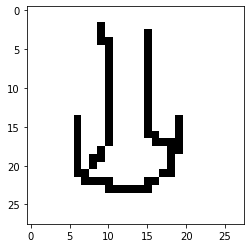

[4.912961e-06, 0.30663657, 0.6933585]
The image is a eye


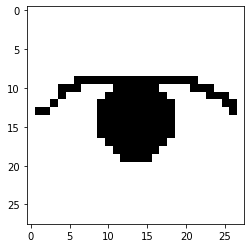

[2.6583756e-08, 0.0046972176, 0.9953028]
The image is a eye


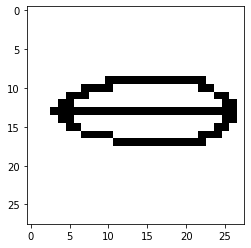

[1.9371708e-05, 0.05006577, 0.9499149]
The image is a eye


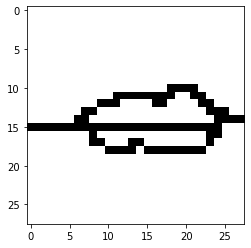

[1.9910933e-06, 0.7211553, 0.27884275]
The image is a lip


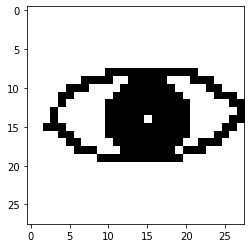

[7.712044e-09, 0.0024133897, 0.9975866]
The image is a eye


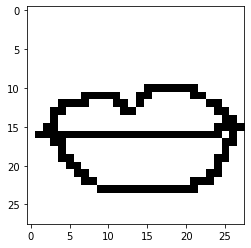

[7.86261e-06, 0.93544126, 0.0645508]
The image is a lip


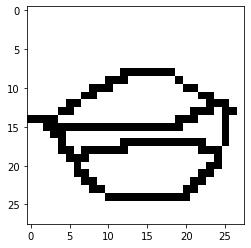

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
image_number = 1
FRUITS = {0: "nose", 1: "lip",2:'eye'}
while os.path.isfile(f"/content/test/{image_number}.png"):
  try:
    img = cv2.imread(f"/content/test/{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    # val = normalize(prediction)
    print(list(prediction[0]))

    print(f"The image is a {FRUITS[np.argmax(prediction)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  
  finally:
    image_number +=1


In [ ]:
import tensorflow
print(tensorflow.__version__)